In [2]:
!pip install torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np

def load_audio(file_path, target_sample_rate=16000):
    """Загрузка аудиофайла и ресемплирование до целевой частоты."""
    waveform, sample_rate = torchaudio.load(file_path)
    if sample_rate != target_sample_rate:
        resampler = T.Resample(sample_rate, target_sample_rate)
        waveform = resampler(waveform)
    return waveform, target_sample_rate

def plot_waveform(waveform, sample_rate):
    """Визуализация исходного аудиосигнала."""
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    plt.figure(figsize=(12, 4))
    plt.plot(time_axis, waveform[0], linewidth=1)
    plt.title("Аудиосигнал")
    plt.xlabel("Время (с)")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.show()

def plot_spectrogram(specgram, title="Спектрограмма"):
    """Визуализация спектрограммы в логарифмической шкале."""
    fig, axs = plt.subplots(1, 1, figsize=(12, 4))
    axs.set_title(title)
    axs.set_xlabel("Время (кадры)")
    axs.set_ylabel("Частота (Гц)")
    im = axs.imshow(torch.log(specgram), aspect='auto', origin='lower')
    fig.colorbar(im, ax=axs)
    plt.show()

def audio_to_spectrogram(audio_path, n_fft=400, win_length=None, hop_length=None, n_mels=128):
    """Преобразование аудио в спектрограмму и Mel-спектрограмму."""
    waveform, sample_rate = load_audio(audio_path)

    # Параметры по умолчанию, если не заданы
    win_length = win_length or n_fft
    hop_length = hop_length or win_length // 2

    # Обычная спектрограмма (STFT)
    stft_transform = T.Spectrogram(
        n_fft=n_fft,
        win_length=win_length,
        hop_length=hop_length,
        power=2,
    )
    spectrogram = stft_transform(waveform)

    # Mel-спектрограмма
    mel_transform = T.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=n_fft,
        win_length=win_length,
        hop_length=hop_length,
        n_mels=n_mels,
    )
    mel_spectrogram = mel_transform(waveform)

    # Визуализация
    plot_waveform(waveform, sample_rate)
    plot_spectrogram(spectrogram[0], title="Спектрограмма (STFT)")
    plot_spectrogram(mel_spectrogram[0], title="Mel-спектрограмма")

    return spectrogram, mel_spectrogram

# Пример использования
if __name__ == "__main__":
    audio_path = "your_audio_file.wav"  # Укажите путь к вашему аудиофайлу
    spectrogram, mel_spectrogram = audio_to_spectrogram(audio_path)

RuntimeError: Failed to open the input "your_audio_file.wav" (No such file or directory).
Exception raised from get_input_format_context at /__w/audio/audio/pytorch/audio/src/libtorio/ffmpeg/stream_reader/stream_reader.cpp:42 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x96 (0x7d1881b6c1b6 in /usr/local/lib/python3.11/dist-packages/torch/lib/libc10.so)
frame #1: c10::detail::torchCheckFail(char const*, char const*, unsigned int, std::string const&) + 0x64 (0x7d1881b15a76 in /usr/local/lib/python3.11/dist-packages/torch/lib/libc10.so)
frame #2: <unknown function> + 0x42034 (0x7d1881aa8034 in /usr/local/lib/python3.11/dist-packages/torio/lib/libtorio_ffmpeg4.so)
frame #3: torio::io::StreamingMediaDecoder::StreamingMediaDecoder(std::string const&, std::optional<std::string> const&, std::optional<std::map<std::string, std::string, std::less<std::string>, std::allocator<std::pair<std::string const, std::string> > > > const&) + 0x14 (0x7d1881aaaa34 in /usr/local/lib/python3.11/dist-packages/torio/lib/libtorio_ffmpeg4.so)
frame #4: <unknown function> + 0x3bfee (0x7d179cc9afee in /usr/local/lib/python3.11/dist-packages/torio/lib/_torio_ffmpeg4.so)
frame #5: <unknown function> + 0x330c7 (0x7d179cc920c7 in /usr/local/lib/python3.11/dist-packages/torio/lib/_torio_ffmpeg4.so)
frame #6: /usr/bin/python3() [0x55577b]
frame #7: _PyObject_MakeTpCall + 0x27c (0x52f85c in /usr/bin/python3)
frame #8: /usr/bin/python3() [0x5855cd]
frame #9: /usr/bin/python3() [0x56e459]
frame #10: /usr/bin/python3() [0x52fc40]
frame #11: <unknown function> + 0xfc6b (0x7d18b0ac6c6b in /usr/local/lib/python3.11/dist-packages/torchaudio/lib/_torchaudio.so)
frame #12: _PyObject_MakeTpCall + 0x27c (0x52f85c in /usr/bin/python3)
frame #13: _PyEval_EvalFrameDefault + 0x6bc (0x53da0c in /usr/bin/python3)
frame #14: _PyFunction_Vectorcall + 0x173 (0x5663a3 in /usr/bin/python3)
frame #15: /usr/bin/python3() [0x56e0e6]
frame #16: _PyObject_MakeTpCall + 0x23b (0x52f81b in /usr/bin/python3)
frame #17: _PyEval_EvalFrameDefault + 0x6bc (0x53da0c in /usr/bin/python3)
frame #18: /usr/bin/python3() [0x613cd4]
frame #19: PyEval_EvalCode + 0x97 (0x613337 in /usr/bin/python3)
frame #20: /usr/bin/python3() [0x62d0d3]
frame #21: _PyEval_EvalFrameDefault + 0x38f4 (0x540c44 in /usr/bin/python3)
frame #22: /usr/bin/python3() [0x628b90]
frame #23: _PyEval_EvalFrameDefault + 0x343f (0x54078f in /usr/bin/python3)
frame #24: /usr/bin/python3() [0x628b90]
frame #25: _PyEval_EvalFrameDefault + 0x343f (0x54078f in /usr/bin/python3)
frame #26: /usr/bin/python3() [0x628b90]
frame #27: /usr/bin/python3() [0x62b1ac]
frame #28: _PyEval_EvalFrameDefault + 0x3a82 (0x540dd2 in /usr/bin/python3)
frame #29: /usr/bin/python3() [0x585ce7]
frame #30: /usr/bin/python3() [0x5854ce]
frame #31: PyObject_Call + 0xf4 (0x570914 in /usr/bin/python3)
frame #32: _PyEval_EvalFrameDefault + 0x491a (0x541c6a in /usr/bin/python3)
frame #33: /usr/bin/python3() [0x628b90]
frame #34: _PyEval_EvalFrameDefault + 0x343f (0x54078f in /usr/bin/python3)
frame #35: /usr/bin/python3() [0x628b90]
frame #36: _PyEval_EvalFrameDefault + 0x343f (0x54078f in /usr/bin/python3)
frame #37: /usr/bin/python3() [0x628b90]
frame #38: _PyEval_EvalFrameDefault + 0x343f (0x54078f in /usr/bin/python3)
frame #39: /usr/bin/python3() [0x628b90]
frame #40: _PyEval_EvalFrameDefault + 0x343f (0x54078f in /usr/bin/python3)
frame #41: /usr/bin/python3() [0x628b90]
frame #42: <unknown function> + 0x745f (0x7d18bcf1145f in /usr/lib/python3.11/lib-dynload/_asyncio.cpython-311-x86_64-linux-gnu.so)
frame #43: /usr/bin/python3() [0x553bdf]
frame #44: /usr/bin/python3() [0x4d0da1]
frame #45: /usr/bin/python3() [0x4e9708]
frame #46: /usr/bin/python3() [0x54b41b]
frame #47: _PyEval_EvalFrameDefault + 0x978c (0x546adc in /usr/bin/python3)
frame #48: /usr/bin/python3() [0x613cd4]
frame #49: PyEval_EvalCode + 0x97 (0x613337 in /usr/bin/python3)
frame #50: /usr/bin/python3() [0x62d0d3]
frame #51: /usr/bin/python3() [0x54b41b]
frame #52: PyObject_Vectorcall + 0x35 (0x54b305 in /usr/bin/python3)
frame #53: _PyEval_EvalFrameDefault + 0x6bc (0x53da0c in /usr/bin/python3)
frame #54: _PyFunction_Vectorcall + 0x173 (0x5663a3 in /usr/bin/python3)
frame #55: /usr/bin/python3() [0x63ef00]
frame #56: Py_RunMain + 0x13c (0x63e85c in /usr/bin/python3)
frame #57: Py_BytesMain + 0x2d (0x6045dd in /usr/bin/python3)
frame #58: <unknown function> + 0x29d90 (0x7d18bd64ed90 in /lib/x86_64-linux-gnu/libc.so.6)
frame #59: __libc_start_main + 0x80 (0x7d18bd64ee40 in /lib/x86_64-linux-gnu/libc.so.6)
frame #60: _start + 0x25 (0x604465 in /usr/bin/python3)


100%|██████████| 106k/106k [00:00<00:00, 843kB/s]
/usr/local/lib/python3.11/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


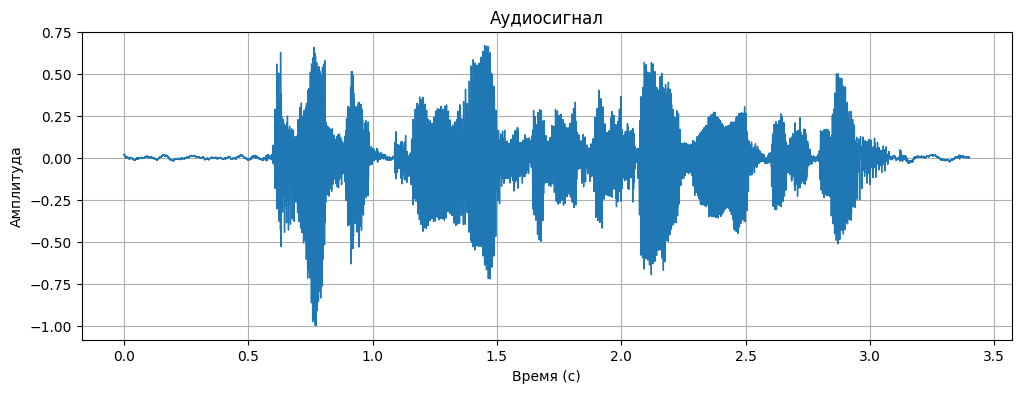

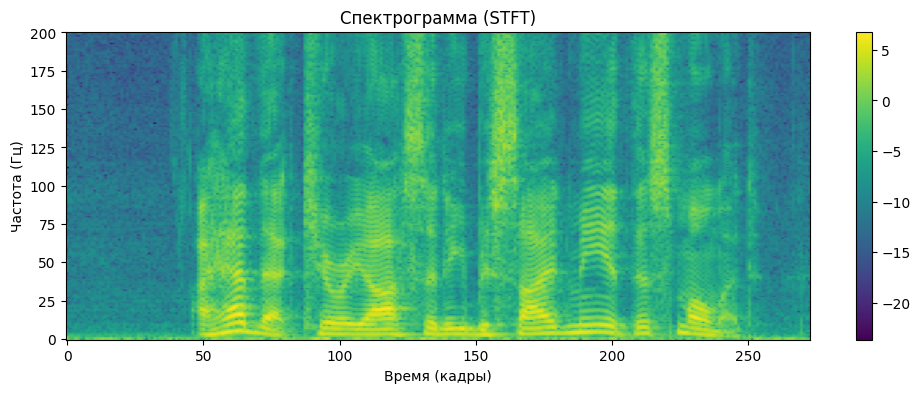

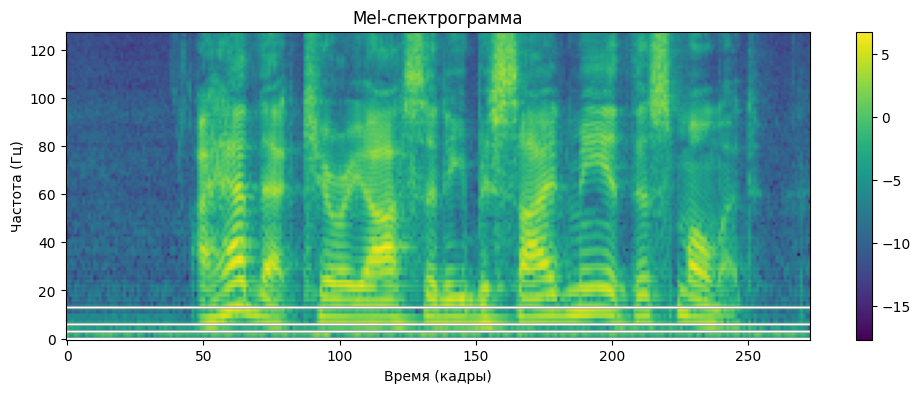

(tensor([[[5.4815e+00, 1.5772e-01, 1.3105e-01,  ..., 2.1306e+00,
           6.8096e-01, 1.8927e-01],
          [3.6053e+00, 5.9546e-02, 6.1161e-02,  ..., 5.8467e-01,
           1.7731e-01, 2.2788e-02],
          [8.1372e-01, 1.4541e-01, 1.4256e-01,  ..., 1.5266e-02,
           6.5624e-03, 2.1952e-05],
          ...,
          [1.7497e-06, 7.0294e-07, 3.0348e-07,  ..., 2.7324e-07,
           3.8198e-07, 1.1339e-06],
          [6.9047e-06, 5.6465e-06, 1.2615e-06,  ..., 4.1064e-06,
           4.2961e-06, 8.7537e-08],
          [2.4680e-05, 1.9506e-05, 1.1039e-06,  ..., 4.9397e-06,
           1.5376e-06, 8.1078e-07]]]),
 tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [5.6471e-01, 9.3270e-03, 9.5799e-03,  ..., 9.1581e-02,
           2.7773e-02, 3.5695e-03],
          [3.0406e+00, 5.0219e-02, 5.1581e-02,  ..., 4.9309e-01,
           1.4954e-01, 1.9219e-02],
          ...,
          [5.2746e-06, 7.7066e-06, 5.3824e-06,  ..., 1.867

In [4]:
# Альтернативный пример с тестовым аудио из torchaudio
waveform, sample_rate = torchaudio.load(torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"))
torchaudio.save("test_audio.wav", waveform, sample_rate)
audio_to_spectrogram("test_audio.wav")